# Time domain analysis of NR injection of an Eccentric,Precessing waveform and recovery with non-eccentric waveform


## Procedure

1. Compute the Covariance matrix for 16s of data
1. Inject a precessing waveform with ~24 SNR
1. Recover with SEOBNRv4PHM


In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import numpy as np

import gwpy
print(gwpy.__version__)

import matplotlib.pyplot as plt
import config
config.conf_matplolib()

3.0.8


In [2]:
%%bash
hostname

sonic13


In [3]:
from gwosc.datasets import event_gps

gps0 = event_gps('GW150914')+10
#gps1 = event_gps('GW190412')
print(gps0)

1126259472.4


In [4]:
sf = 4096

In [42]:
ans_dur = 1

# Load the noise data

In [14]:
from gwpy.timeseries import TimeSeries
#ldata0 = TimeSeries.fetch_open_data('L1', *segment0, verbose=True)

# data_file_name = "Entire_noise_ts_gpsT1126259462_R200_D8_S4096_A1.txt"
#data_file_name = "Entire_noise_ts_gpsT1126259472_R128_D4_S4096_A0.02_N1000.txt"
data_file_name = 'Entire_noise_ts_gpsT1126259462_R512_D16_S4096_A1_N100.txt'
req_duration = 16

ldata0f = TimeSeries.read(data_file_name)[:req_duration*sf]

In [15]:
N0 = len(ldata0f)
#N1 = len(ldata1)

N0#, N1

65536

In [16]:
N0/4096

16.0

In [17]:
# ldata1.write("GW150914_af_16s.txt")

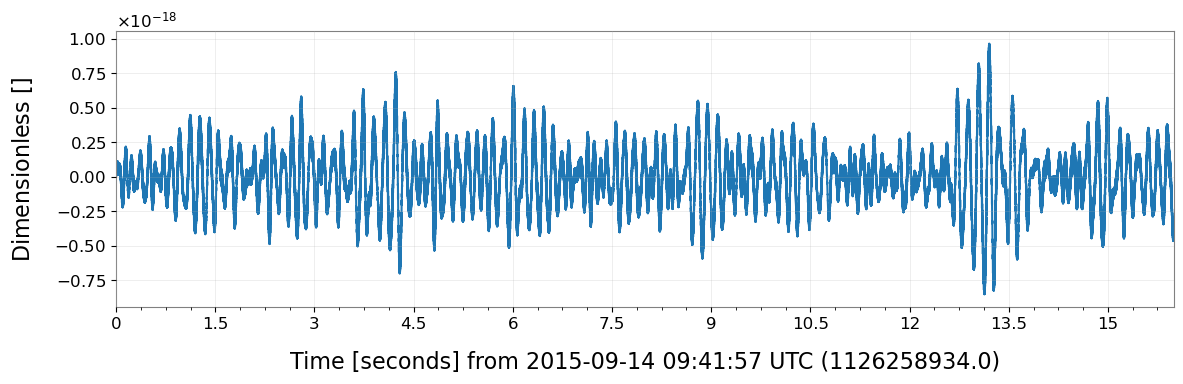

In [18]:
plot0 = ldata0f.plot()

In [19]:
np.mean(ldata0f)

<Quantity -9.82319322e-22>

In [20]:
ldata0f.times[-1] - ldata0f.times[0]

<Quantity 15.99975586 s>

# Prepare the noise covariance

In [21]:
#Cij_file_name = "Cij_gpsT1126259462_R200_D8_S4096_A1.npy"
#Cij_file_name = f"Cij_gpsT1126259472_R128_D4_S4096_A0.02_N1000.npy"
Cij_file_name=f"Cij_gpsT1126259462_R512_D16_S4096_A1_N100.npy"

In [22]:

Cij = np.load(Cij_file_name)

In [23]:
Cij.shape

(4096, 4096)

In [24]:
np.linalg.det(Cij)

0.0

In [25]:
Lij = np.linalg.cholesky(Cij)

In [26]:
Lij

array([[ 2.41943640e-19,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.40317796e-19,  2.80014579e-20,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.37119177e-19,  4.14051419e-20,  2.44302087e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.39224639e-21, -1.06339406e-21,  8.76399672e-21, ...,
         1.82936270e-21,  0.00000000e+00,  0.00000000e+00],
       [-8.17387758e-21, -1.10017854e-20,  4.37217180e-21, ...,
         1.70032197e-21,  1.82936014e-21,  0.00000000e+00],
       [-6.53016689e-21, -1.45814686e-20, -4.92090371e-21, ...,
         1.32540694e-21,  1.70031326e-21,  1.82935623e-21]])

In [27]:
inv_Lij = np.linalg.inv(Lij)

In [21]:
inv_Cij = np.linalg.inv(Cij)

In [19]:
np.save(f"inj{Cij_file_name}", inv_Cij)

In [16]:
inv_Cij = np.load(f"inj{Cij_file_name}")

In [45]:
inv_Cij@Cij

array([[ 1.00000000e+00, -2.06362579e-13, -5.33462407e-13, ...,
         2.64251568e-11,  2.59874371e-11,  2.83680876e-11],
       [ 7.69229926e-11,  1.00000000e+00,  7.47588940e-11, ...,
         4.25431493e-11,  4.27627483e-11,  3.58207181e-11],
       [-2.31152077e-10, -2.28300613e-10,  1.00000000e+00, ...,
        -2.14973524e-10, -2.13604918e-10, -2.05746101e-10],
       ...,
       [ 1.17015026e-13, -7.21089984e-13,  3.50142201e-13, ...,
         1.00000000e+00, -2.23477593e-12,  2.42200000e-14],
       [-1.22140678e-13, -2.89554951e-13, -4.33305691e-13, ...,
         2.23893255e-12,  1.00000000e+00, -1.00985292e-12],
       [ 8.22405528e-13,  3.91997224e-13,  9.85976572e-13, ...,
         5.24760552e-13,  1.85707139e-12,  1.00000000e+00]])

In [23]:
Lij@inv_Lij

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.06362905e-16,  1.00000000e+00,  1.09544348e-15, ...,
         1.91687629e-16, -1.97448622e-16,  0.00000000e+00],
       [-2.41405111e-15, -2.34007211e-15,  1.00000000e+00, ...,
         1.04894714e-17, -3.02259503e-17,  0.00000000e+00],
       ...,
       [-5.07398040e-16, -2.52985683e-15, -1.64351453e-15, ...,
         1.00000000e+00, -5.73199630e-17,  0.00000000e+00],
       [-1.85763179e-15, -2.71814348e-16, -2.78210718e-15, ...,
        -3.46532574e-17,  1.00000000e+00,  0.00000000e+00],
       [-8.10703325e-16,  2.74988718e-15, -3.18506410e-15, ...,
        -7.26649850e-16,  1.11758579e-16,  1.00000000e+00]])

# Inject a signal in the noise

In [28]:
from waveformtools.waveforms import modes_array

/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/waveformtools/waveformtools


In [29]:
path_to_waveform = "/mnt/pfs/vaishak.p/Projects/Codes/waveforms/eccprecrun4b_waveforms_Lev3/extrapolated/rhOverM_Extrapolated_N3_CoM.h5"
data_dir = '/mnt/pfs/vaishak.p/Projects/Codes/waveforms/eccprecrun4b_waveforms_Lev3/extrapolated'
file_name = 'rhOverM_Extrapolated_N3_CoM.h5'

In [30]:
wfm = modes_array(label='eccprecrun4b', file_name=file_name, data_dir=data_dir)

In [31]:
wfm.load_modes(ftype='SpEC')

Loading SpEC data.


In [32]:
from waveformtools.waveformtools import get_starting_angular_frequency, get_waveform_angular_frequency

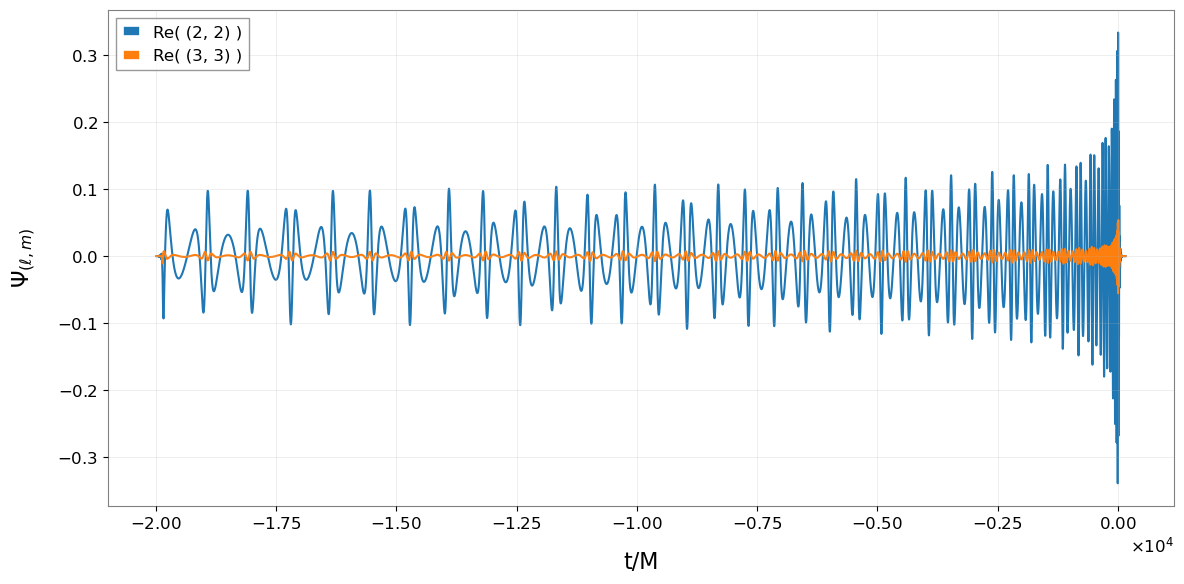

In [33]:
wfm.plot_modes()

In [34]:
wfm.data_len

389833

In [35]:
h22 = wfm.mode(2, 2)

In [36]:
omega22 = get_waveform_angular_frequency(h22, wfm.delta_t())

In [37]:
config.conf_matplolib()

(0.0, 0.04)

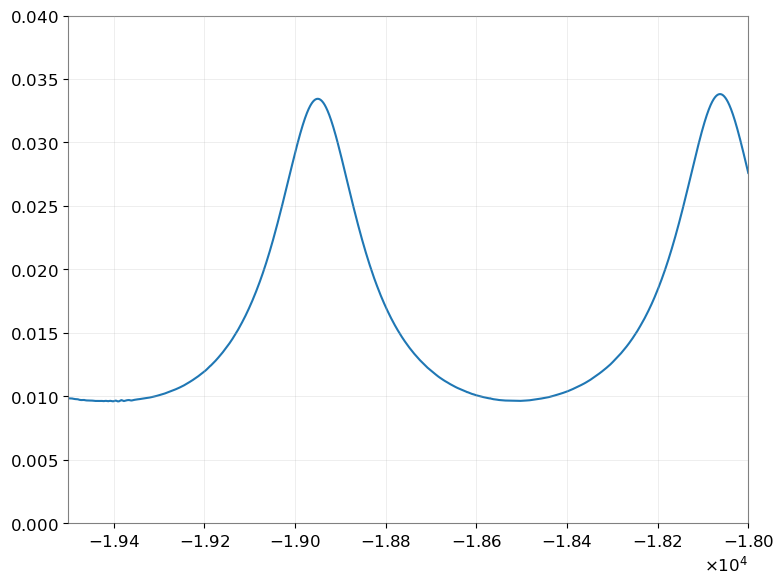

In [38]:
start = 2500
end = 5800
plt.plot(wfm.time_axis, -omega22)
plt.xlim(-19500, -18000)
plt.ylim(0, 0.04)

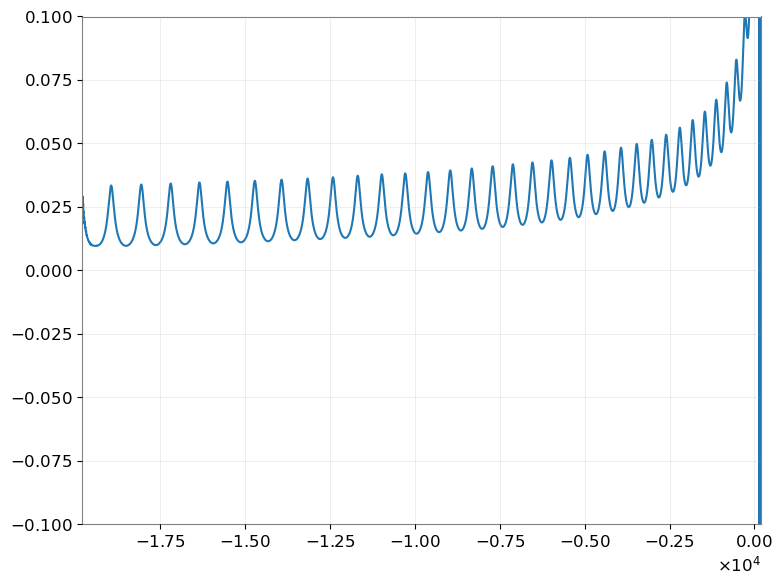

In [39]:
plt.plot(wfm.time_axis, -omega22)
plt.xlim(-19800, 200)
plt.ylim(-0.1, 0.1)
plt.show()

In [40]:
0.024

0.024

In [69]:
wfm.delta_t()

0.05167833379164222

In [70]:
time_axis = np.array(ldata0f.times)

In [71]:
Msun = 2*1e30
G = 6.6743 * 1e-11
c = 2.99792458 * 1e8
Mevent = 62

Tc = G*Msun*Mevent/(c**3)

In [72]:
Tc

0.0003071604534396641

In [73]:
#omega_st = 2*0.025/Tc
omega_st = 2*0.00429/Tc

print('Starting 1Msun angular frequency ', omega_st)

f0 = omega_st/(2*np.pi)

print('Starting frequency ', f0)

Massigned = (30/f0)

print('Assigned mass is ', Massigned)

Starting 1Msun angular frequency  27.933283415618416
Starting frequency  4.445720132382533
Assigned mass is  6.748063104890617


# Signal model

In [74]:
from pycbc.waveform import td_approximants
from pycbc.waveform import get_td_waveform

#approximant='SEOBNRv4PHM'
approximant='IMRPhenomXPHM'

In [75]:
help(get_td_waveform)

modes_select = [(2, 2), (3, 3)]

Help on function get_td_waveform in module pycbc.waveform.waveform:

get_td_waveform(template=None, **kwargs)
    Return the plus and cross polarizations of a time domain waveform.
    
    Parameters
    ----------
    template: object
        An object that has attached properties. This can be used to subsitute
        for keyword arguments. A common example would be a row in an xml table.
    mass1 : {None, float}
        The mass of the first component object in the binary (in solar masses).
    mass2 : {None, float}
        The mass of the second component object in the binary (in solar masses).
    spin1x : {0.0, float}
        The x component of the first binary component's dimensionless spin.
    spin1y : {0.0, float}
        The y component of the first binary component's dimensionless spin.
    spin1z : {0.0, float}
        The z component of the first binary component's dimensionless spin.
    spin2x : {0.0, float}
        The x component of the second binary component's dim

In [76]:
def signal_generator(x):

    mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z = x

    hp, hc = get_td_waveform(approximant=approximant,
                                 mass1=mass1,
                                 mass2=mass2,
                                 spin1x=spin1x,
                                 spin1y=spin1y,
                                 spin1z=spin1z,
                                 spin2x=spin2x,
                                 spin2y=spin2y,
                                 spin2z=spin2z,
                                 delta_t=1/sf,
                                 mode_array=modes_select,
                                 f_lower=20)

    return hp + 1j*hc

def get_damped_sinusoid(time_axis, x):

    A, omega, gamma, t, phi = x
    return A*np.cos(omega*(time_axis-t) + phi) * np.exp(-gamma*(time_axis-t))

In [77]:
#Massigned=25

In [78]:
q=2
mass1 = Massigned * q/(1+q)
mass2 = Massigned* 1/(1+q)
spin1z=0.2
spin2z=0.2

spin1x=0.08876
spin1y=0.10947

spin2y=0.10947
spin2x=0.08876

params = [mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z]
#params = [mass1, mass2, 0, 0, spin1z, 0, 0, spin2z]

In [79]:
mass1, mass2

(4.498708736593745, 2.2493543682968724)

In [80]:
full_data = ldata0f

In [81]:
len(time_axis)

65536

# Data conditioning

In [82]:
def whiten(x):

    return np.dot(inv_Lij, x)

def inner_product(x, y):

    xbar = whiten(x)
    ybar = whiten(y)

    return np.dot(xbar, ybar)

# Inject NR signal

In [83]:
sg = wfm.to_td_waveform(Massigned, np.pi/2, 0, distance=220, delta_t=1/sf)

In [84]:
len(sg)

3

In [86]:
len(sg[0])

2743

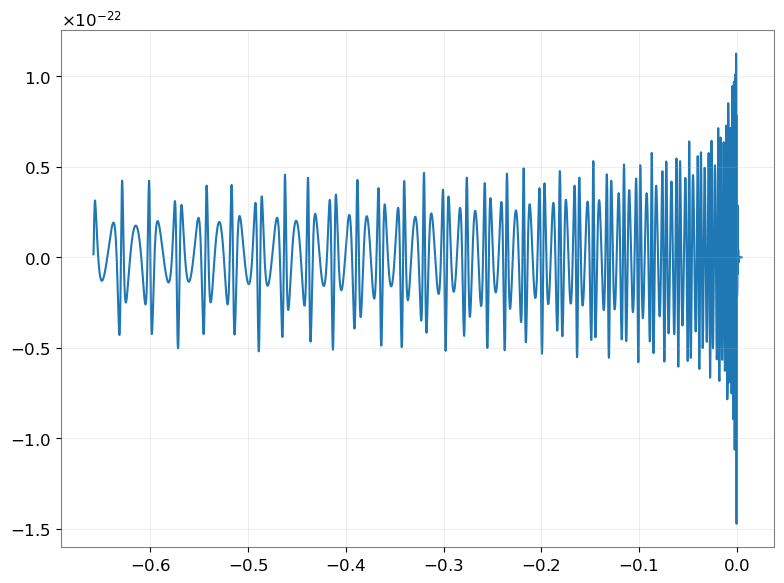

In [89]:
plt.plot(sg[0][25:], sg[1][25:])
plt.show()

In [50]:
def generate_nr_injection(wfm, params):

    Mtotal, D, theta, phi = params

    signal = wfm.td_waveform(Mtotal=Mtotal, theta=theta, phi=phi, distance=D, delta_t=1/sf)

    return signal


def nr_injection(time):

    hp = np.interp(time, signal_t, signal_hp)
    hc = np.interp(time, signal_t, signal_hx)

    return {"plus": hp, "cross": hx}

In [91]:
np.array(sg).shape

(3, 2743)

In [105]:
#A0 = 3e-19

#mass1 = 32
#mass2 = 50
#spin1x = spin1y = spin1z = spin2x = spin2y = spin2z = 0


#inj_params = [mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z]

#signal = A0 * h22.real #wfm.to_td_waveform(Mtotal=Massigned, theta=np.pi/3, )

#time_axis_0 = time_axis[req_duration*sf:(req_duration+1)*sf]

#signal = signal_generator(inj_params).real
#inj_params = [Massigned, 220, np.pi/8, 0]

signal_t, signal_hp, signal_hc = np.array(sg)[:, 25:]#nr_injection(wfm, inj_params)

def_num = ans_dur*sf - len(signal_t)
print("Deficit number is ", def_num)

zeros = np.zeros(def_num)


signal_t =  np.linspace(-1, 0, ans_dur*sf)#np.concatenate((zeros, signal_t))
signal_hp = np.concatenate((zeros, signal_hp))
signal_hc = np.concatenate((zeros, signal_hc))
print(len(signal_hp))


Deficit number is  1378
4096


In [106]:
signal_hp[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

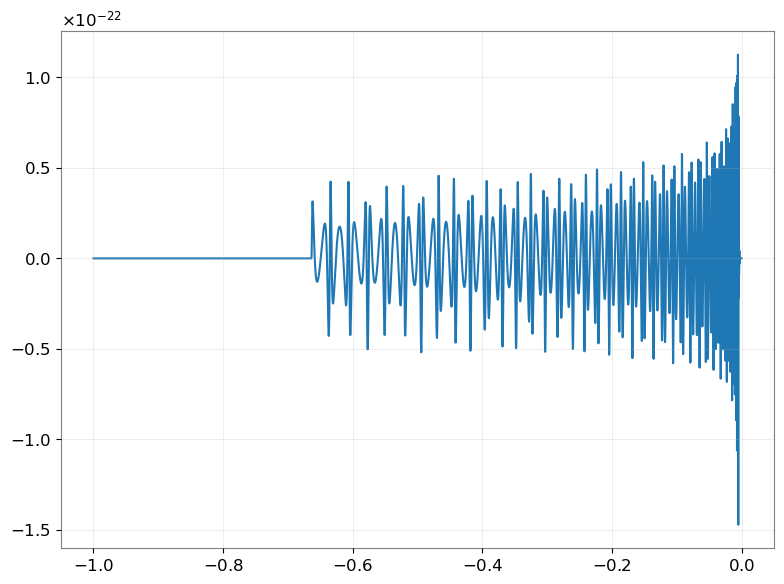

In [109]:
plt.plot(signal_t, signal_hp)

In [110]:
ans_dur

1

In [111]:
len(full_data)

65536

In [124]:
t0=time_axis[0]+8

In [113]:
len(signal_hp)

4096

In [118]:
time_axis - t0

array([-538.4000001 , -538.39975595, -538.39951181, ...,
       -522.40073252, -522.40048838, -522.40024424])

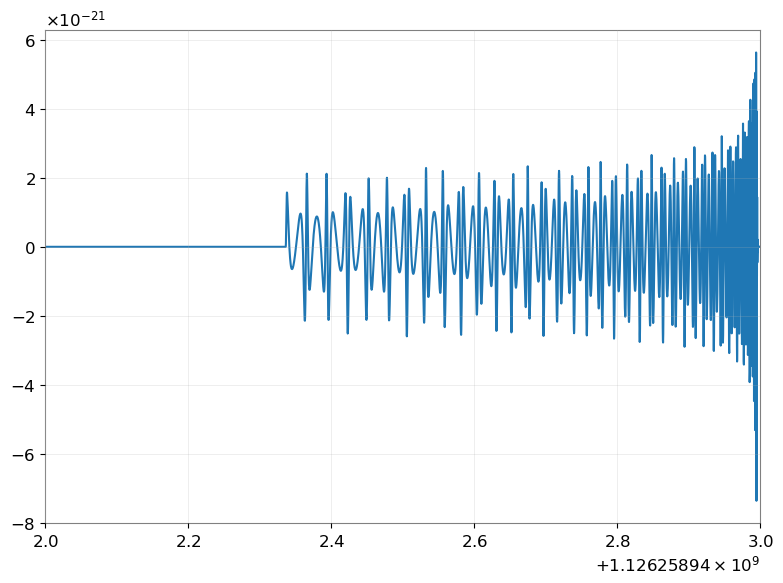

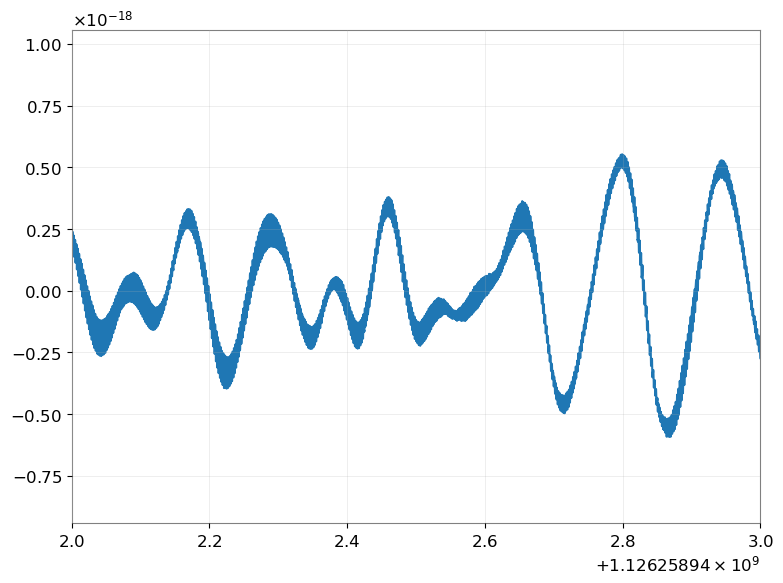

In [140]:
tstart = 8 

A = 50
signal = np.zeros(len(time_axis))

signal[tstart*sf: tstart*sf + int(ans_dur*sf)] = A*signal_hp

analysis_data = full_data + signal
#analysis_data[tstart*sf: (tstart+1)*sf] += signal_hp

plt.plot(time_axis, signal)
plt.xlim(t0, t0+ans_dur)
#plt.ylim(-2e-21, 2e-21)
plt.show()


plt.plot(time_axis, analysis_data)
plt.xlim(t0, t0+(ans_dur))
#plt.ylim(-2e-21, 2e-21)
plt.show()



In [141]:
data_seg = analysis_data[tstart*sf: tstart*sf + int(ans_dur*sf)]
signal_seg = signal[tstart*sf: tstart*sf + int(ans_dur*sf)]
time_seg = time_axis[tstart*sf: tstart*sf + int(ans_dur*sf)]

#signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)
signal_seg_norm = inner_product(signal_seg, signal_seg)

#signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)

#data_sig_inner_prod = np.dot(data_seg, inv_Cij@signal_seg)
data_sig_inner_prod = inner_product(data_seg, signal_seg)

mf_snr = data_sig_inner_prod/np.sqrt(signal_seg_norm)

print('Matched filter SNR', mf_snr)


Matched filter SNR 22.478616304866687


In [142]:
Cij.shape

(4096, 4096)

In [143]:
mf_snr

<Quantity 22.4786163>

In [144]:
analysis_data = np.array(analysis_data)

In [145]:
sf

4096

# Run sampler

In [143]:
res = dsampler.results
results = res

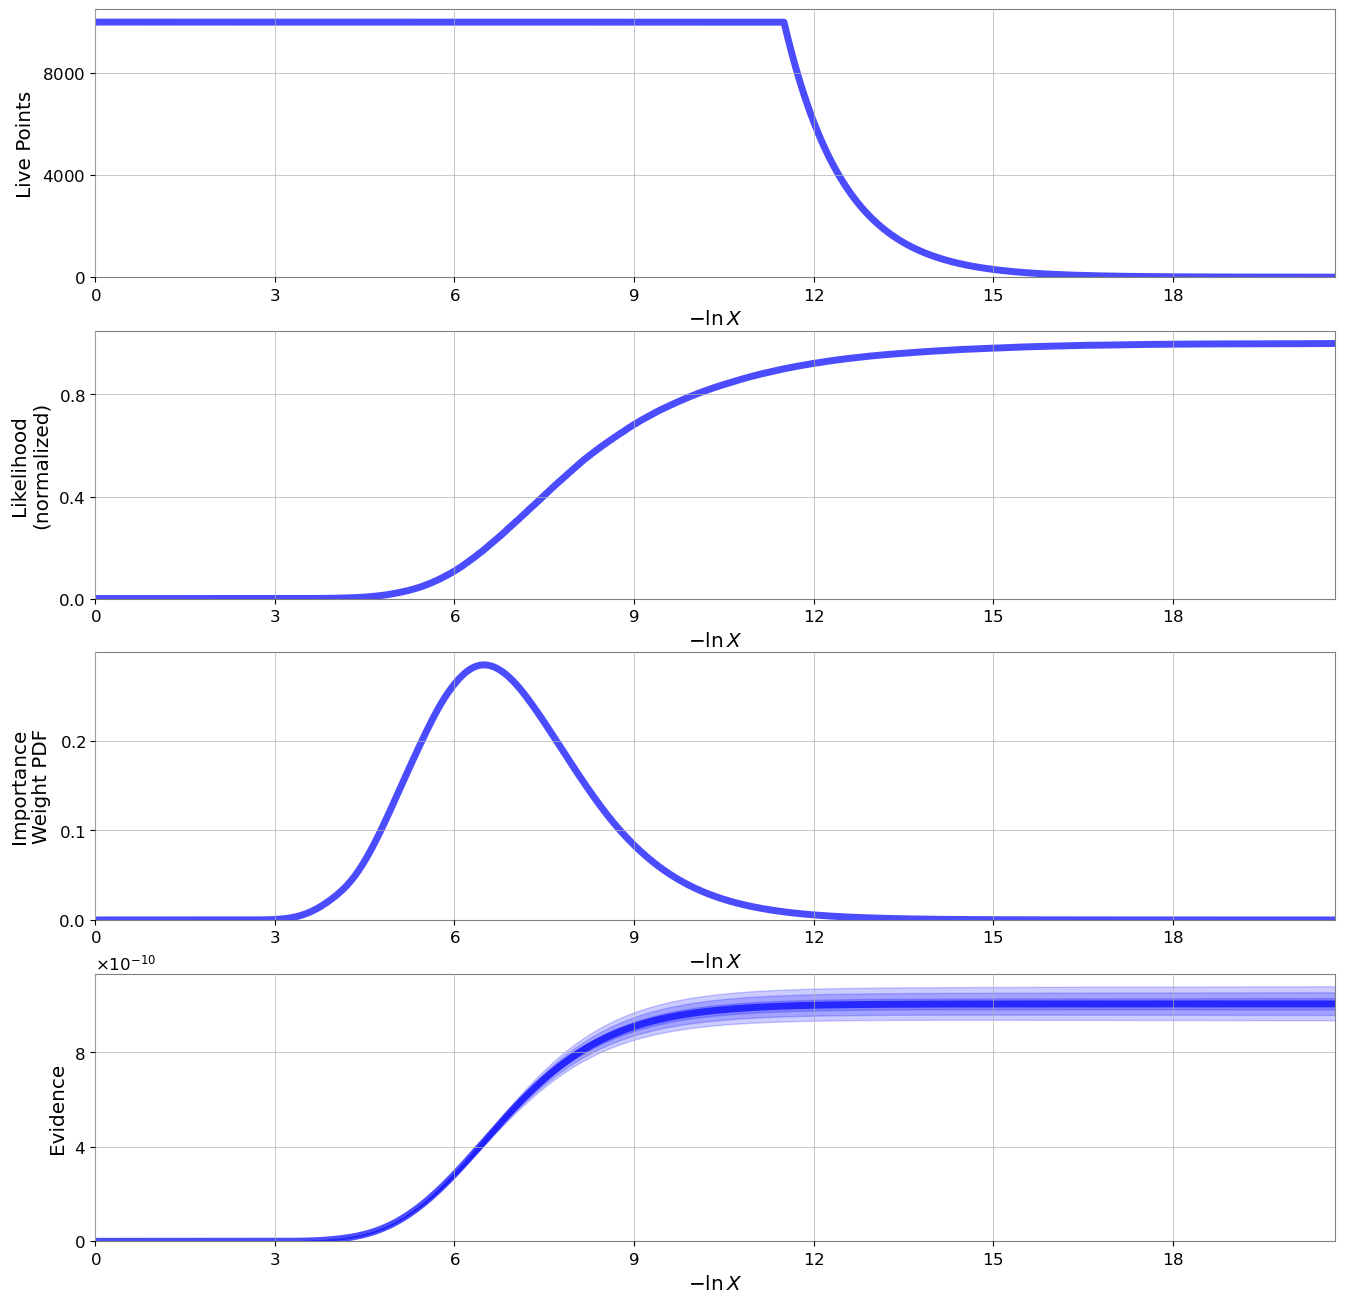

In [144]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(res)

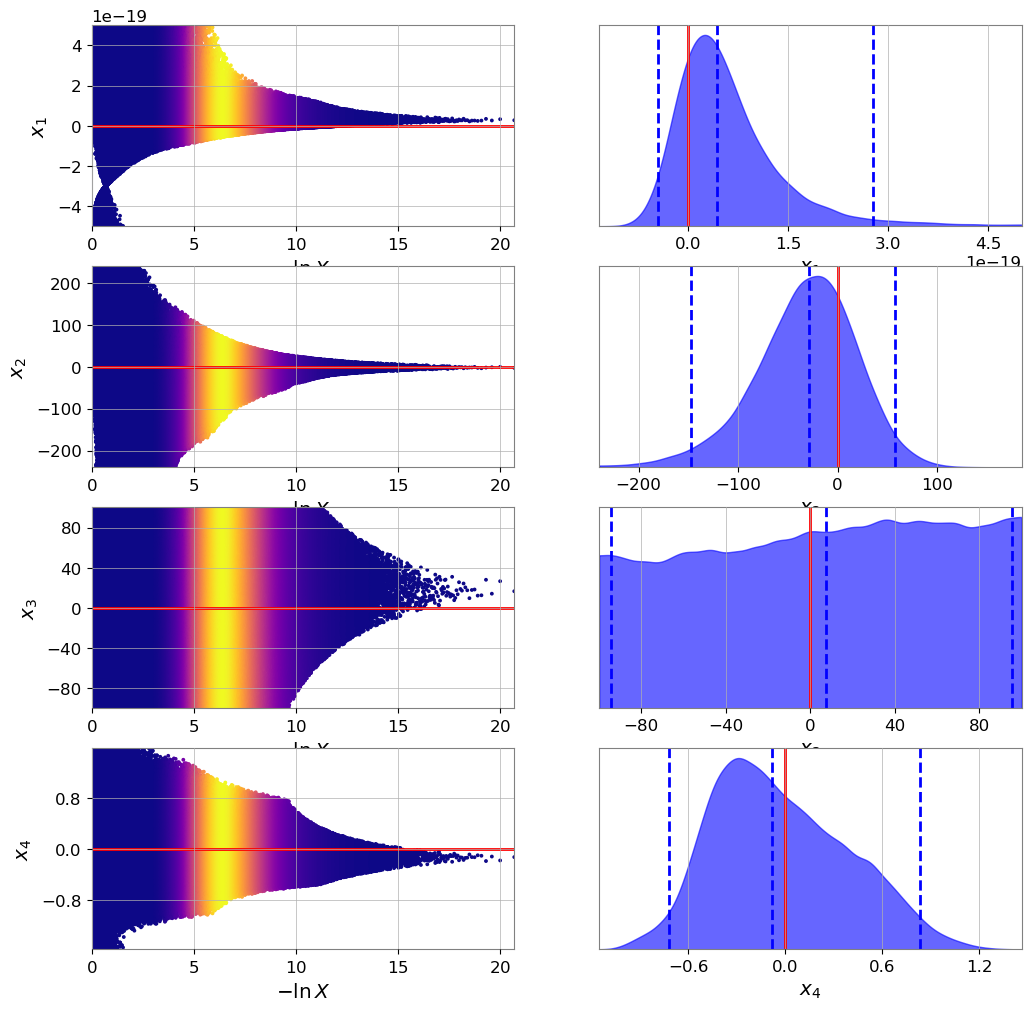

In [145]:
# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(res, truths=[0, 0, 0, 0])

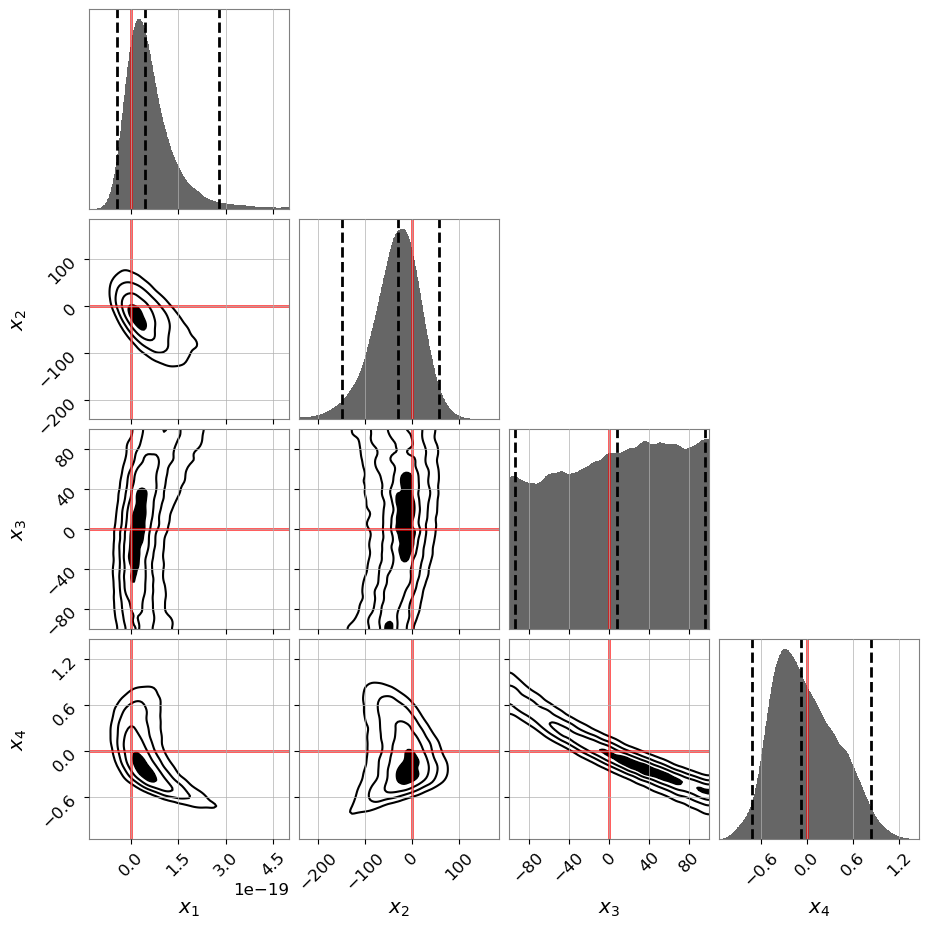

In [146]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0,0,0,0])

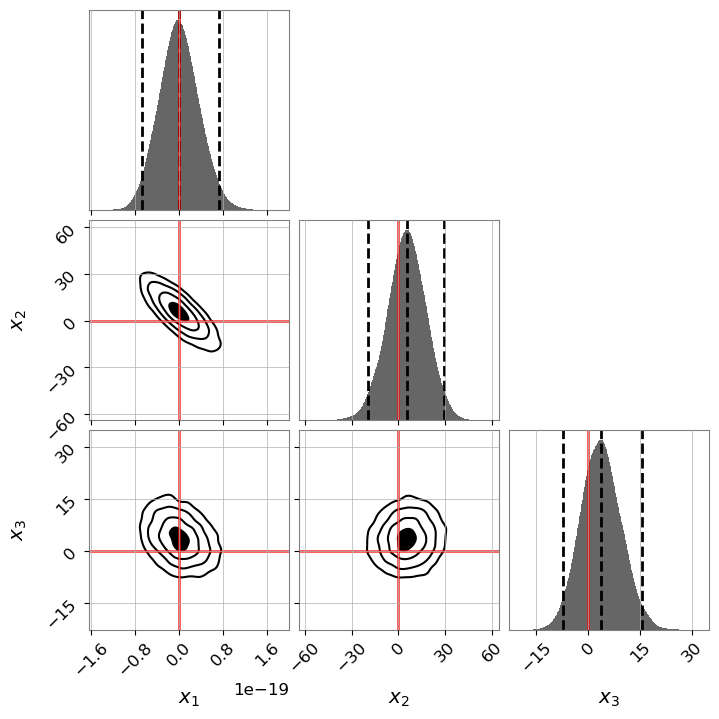

In [130]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0,0,0])

In [116]:
omega0, gamma0

(250, 250)

In [131]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = results.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights)
             for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = results.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(results)


sigmas = []
for pind in range(ndim):

    sigmas.append(np.sqrt(cov[pind, pind]))

print(mean, " +- ", sigmas) 

[6.10300786e-22 5.38461892e+00 3.67118052e+00]  +-  [3.593851242282611e-20, 12.170473570001231, 5.777030733463904]


In [106]:
print(mean, " +- ", sigmas) 

[ 1.83693211e-20 -1.08099441e+01 -3.60752247e+00]  +-  [3.7491895615294976e-20, 38.409115848108186, 18.818838000534274]


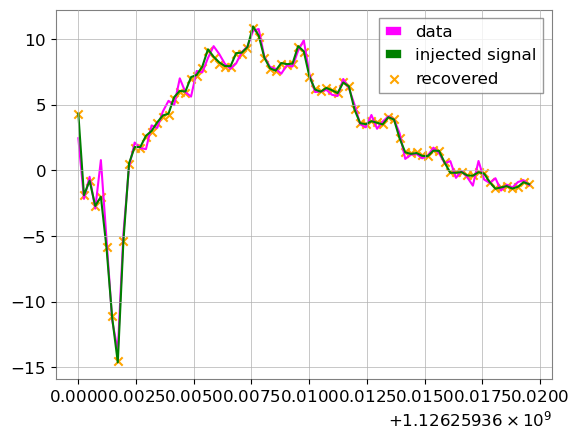

In [121]:
rec_signal_seg = get_damped_sinusoid(time_seg, [A0, omega0 + mean[0], gamma0 + mean[1], t0, phi0])

plt.plot(time_seg, inv_Lij@data_seg, label='data', c='magenta')
plt.plot(time_seg, inv_Lij@signal_seg, label='injected signal', c='green')
plt.scatter(time_seg, inv_Lij@rec_signal_seg, marker='x', c='orange', label='recovered')
plt.legend()
plt.show()